In [81]:
import pandas as pd
import numpy as np
import camelot.io as camelot
from sklearn.linear_model import LinearRegression
import glob
import matplotlib.pyplot as plt

print(dir(camelot))
print(camelot.__file__)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

['PDFHandler', 'Path', 'StrByteType', 'Union', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'read_pdf', 'remove_extra', 'validate_input', 'warnings']
c:\Users\imgee\OneDrive - UCL\Documents\business_analytics\quantitative_decision_making\.venv\Lib\site-packages\camelot\io.py


## functions

In [82]:
def predict_demand(df, column , months_to_exclude = ['january', 'february', 'march']):
    df['growth'] = df[column].pct_change()
    growth_rate = df['growth'].mean()
    print('Growth rate : ', growth_rate)


    data_cols = [col for col in df.columns if col not in ['year', 'month', 'growth']]

    base_rows = df[(df['year'] == 2024) & (~df['month'].isin(months_to_exclude))]

    new_rows = []

    for _, row in base_rows.iterrows():
        new_row = [2025, row['month']] + [row[col] * (1 + growth_rate) for col in data_cols]
        new_rows.append(new_row)

    new_df = pd.DataFrame(new_rows, columns=['year', 'month'] + data_cols)

    df = df.drop(columns='growth')

    df = pd.concat([df, new_df], ignore_index=True)

    return df


## brussels-airlines-analysis

3                      Passengers
4                     Originating
5                        Transfer
6                         Transit
7      Total Departing Passengers
8     Arriving pax (excl Transit)
9      Total number of passengers
10                      Movements
11              Passenger flights
12                  Cargo flights
13         Non-commercial flights
14                Total Movements
15                   Cargo (tons)
16                 Full Freighter
17                     Integrator
18                    Belly cargo
19              Total flown cargo
20                  Trucked cargo
21                    Total cargo
Name: 0, dtype: object
brussels-airlines-demand\april-2024.pdf
brussels-airlines-demand\august-2024.pdf
brussels-airlines-demand\december-2024.pdf
brussels-airlines-demand\february-2024.pdf
brussels-airlines-demand\february-2025.pdf
brussels-airlines-demand\january-2024.pdf
brussels-airlines-demand\january-2025.pdf
brussels-airlines-demand\july-2024.pd

,Passengers,Originating,Transfer,Transit,Total Departing Passengers,Arriving pax (excl Transit),Total number of passengers,Movements,Passenger flights,Cargo flights,...,Total Movements,Cargo (tons),Full Freighter,Integrator,Belly cargo,Total flown cargo,Trucked cargo,Total cargo,month,year
0,NaN,879302.000,115633.000,1212.000,996147.000,961018.000,1957165.000,NaN,13469.000,1503.000,...,16275.000,NaN,21228.000,19191.000,12724.000,53143.000,9572.000,62715.000,April,2024
1,NaN,927155.000,178821.000,1161.000,1107137.000,1308734.000,2415871.000,NaN,16026.000,1606.000,...,18638.000,NaN,15673.000,18166.000,13658.000,47497.000,9047.000,56544.000,August,2024
2,NaN,787628.000,145480.000,4368.000,937476.000,836454.000,1773930.000,NaN,12718.000,1674.000,...,15609.000,NaN,21154.000,22835.000,16140.000,60128.000,9920.000,70048.000,December,2024
3,NaN,675120.000,118461.000,-110.000,793471.000,760006.000,1553477.000,NaN,11236.000,1466.000,...,13888.000,NaN,19009.000,18372.000,11531.000,48912.000,10107.000,59019.000,February,2024
4,NaN,667650.000,115283.000,2411.000,785344.000,742846.000,1528190.000,NaN,11071.000,1463.000,...,13817.000,NaN,16657.000,20664.000,12259.000,49580.000,9598.000,59177.000,February,2025
5,NaN,555859.000,115323.000,623.000,671805.000,731387.000,1403192.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,January,2024
6,NaN,596584.000,128905.000,4192.000,729681.000,788351.000,1518032.000,NaN,11619.000,1645.000,...,14457.000,NaN,18098.000,20498.000,12930.000,51526.000,7860.000,59385.000,January,2025
7,NaN,1200741.000,139883.000,971.000,1341595.000,1109176.000,2450771.000,NaN,16106.000,1623.000,...,19212.000,NaN,16786.000,19896.000,14146.000,50828.000,9932.000,60760.000,July,2024
8,NaN,913184.000,160060.000,1418.000,1074662.000,1023711.000,2098373.000,NaN,14461.000,1443.000,...,17406.000,NaN,12175.000,18976.000,13158.000,44310.000,9315.000,53625.000,June,2024
9,NaN,732031.000,144687.000,210.000,876928.000,865550.000,1742478.000,NaN,12445.000,1536.000,...,15237.000,NaN,20253.000,20441.000,13560.000,54254.000,10498.000,64753.000,March,2024


,Passengers,Originating,Transfer,Transit,Total Departing Passengers,Arriving pax (excl Transit),Total number of passengers,Movements,Passenger flights,Cargo flights,...,Total Movements,Cargo (tons),Full Freighter,Integrator,Belly cargo,Total flown cargo,Trucked cargo,Total cargo,month,year
4,NaN,667650.000,115283.000,2411.000,785344.000,742846.000,1528190.000,NaN,11071.000,1463.000,...,13817.000,NaN,16657.000,20664.000,12259.000,49580.000,9598.000,59177.000,February,2025
6,NaN,596584.000,128905.000,4192.000,729681.000,788351.000,1518032.000,NaN,11619.000,1645.000,...,14457.000,NaN,18098.000,20498.000,12930.000,51526.000,7860.000,59385.000,January,2025
10,NaN,710519.000,128691.000,3301.000,842511.000,891663.000,1734174.000,NaN,12808.000,1661.000,...,15970.000,NaN,19300.000,24153.000,14653.000,58105.000,10322.000,68427.000,March,2025
15,NaN,906916.875,119264.508,1250.063,1027431.438,991199.188,2018630.625,NaN,13892.000,1550.202,...,16786.123,NaN,21894.676,19793.701,13123.603,54811.980,9872.613,64684.594,April,2025
16,NaN,956272.750,184436.953,1197.462,1141907.125,1349835.375,2491742.500,NaN,16529.305,1656.437,...,19223.334,NaN,16165.218,18736.512,14086.936,48988.664,9331.125,58319.789,August,2025
17,NaN,812363.812,150048.859,4505.179,966917.875,862723.188,1829641.125,NaN,13117.414,1726.573,...,16099.208,NaN,21818.352,23552.143,16646.885,62016.348,10231.542,72247.891,December,2025
18,NaN,1238450.750,144276.094,1001.495,1383728.375,1144010.125,2527738.500,NaN,16611.816,1673.971,...,19815.361,NaN,17313.172,20520.844,14590.262,52424.277,10243.919,62668.195,July,2025
19,NaN,941862.938,165086.750,1462.533,1108412.250,1055861.125,2164273.250,NaN,14915.154,1488.318,...,17952.643,NaN,12557.361,19571.949,13571.232,45701.574,9607.542,55309.117,June,2025
20,NaN,928702.250,130426.375,1449.125,1060577.750,1108006.875,2168584.500,NaN,15137.938,1619.307,...,18126.951,NaN,17371.963,21631.666,12774.988,51778.617,9179.509,60958.125,May,2025
21,NaN,732043.125,128618.320,3424.266,864085.688,947922.438,1812008.125,NaN,12904.945,1828.682,...,16029.072,NaN,18345.609,24661.936,14571.696,57579.242,11854.975,69434.211,November,2025


[np.float32(3379190.5), np.float32(20540946.0), np.float32(42804.46), np.float32(23933952.0)]


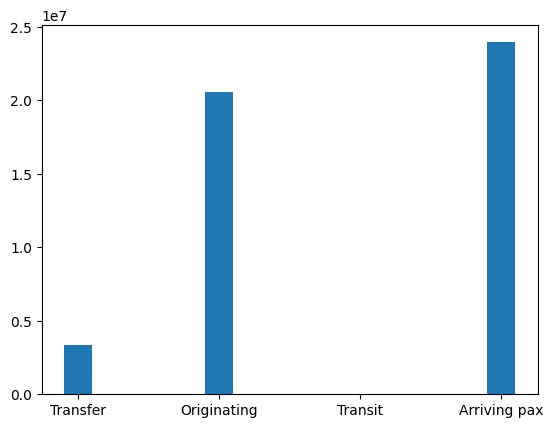

In [93]:
tables = []

# Lecture du premier fichier pour extraire les colonnes
root_path = 'brussels-airlines-demand/december-2024.pdf'
pdf = camelot.read_pdf(root_path, flavor='stream')
tab = pdf[0].df
tab = tab.drop(tab.columns[[3, 4, 5, 6]], axis=1)
month = tab.iloc[0, 2]
year = tab.iloc[2, 1]
tab = tab.drop([0, 2], axis=0)
tab = tab.drop([1])
tab = tab.drop(columns=2)
tab = tab.T
columns = tab.iloc[0] 

print(columns)

for filepath in glob.iglob('brussels-airlines-demand/*.pdf'):
    print(filepath)
    pdf = camelot.read_pdf(filepath, flavor='stream')
    tab = pdf[0].df
    tab = tab.drop(tab.columns[[3, 4, 5, 6]], axis=1)
    month = tab.iloc[0, 2]
    year = tab.iloc[2, 1]
    tab = tab.drop([0, 2], axis=0)
    tab = tab.drop([1])
    tab = tab.drop(columns=tab.columns[2])
    tab = tab.T
    header = tab.iloc[0]
    tab = tab[~tab.apply(lambda row: row.equals(header), axis=1)]
    tab['month'] = month
    tab['year'] = year
    tab = tab.replace(',', '', regex=True)
    for col in tab.columns:
        if col not in ['month', 'year'] :
            tab[col] = pd.to_numeric(tab[col], errors='coerce', downcast='float')
    tab['year'] = pd.to_numeric(tab['year'], downcast = 'integer')
    tables.append(tab)

# Concaténation finale
brussels_data = pd.concat(tables, ignore_index=True)
brussels_data.columns = list(columns) + ['month', 'year']

predicted = predict_demand(brussels_data, 'Total number of passengers', ['January', 'February', 'March'])

display(predicted)

display(predicted[predicted['year'] == 2025])

totaltransfer = predicted['Transfer'].sum()
totaloriginating = predicted['Originating'].sum()
totaltransit = predicted['Transit'].sum()
totalarrivingpax = predicted['Arriving pax (excl Transit)'].sum()

totalpassengers = predicted['Total number of passengers'].sum()

passengers_agg = [totaltransfer, totaloriginating, totaltransit, totalarrivingpax]
print(passengers_agg)

plt.bar(['Transfer', 'Originating', 'Transit', 'Arriving pax'], passengers_agg, width = 0.2)
plt.show()



## schiphol-analysis

In [94]:
schiphol = pd.read_csv('traffic-data-schiphol.csv', sep =';', decimal=',')

months = [m for m in schiphol['month'].unique() if m not in ['january', 'february', 'march']]

air_transport_movements = ['air-transport-europe','air-transport-intercont']
passengers_dest = ['europe', 'intercontinental']
passengers_extremity = ['o&d', 'transfer']
schedule = ['scheduled', 'nonscheduled', 'transit-direct']
cargo = ['cargo-mail-tons', 'cargo-tons']

# Convertir toutes les colonnes en numérique

for i in schiphol.columns.to_list():
    if ('passengers-total' in i) and not (i == 'passengers-total'):
        schiphol.drop(i, axis=1, inplace=True)
for i in schiphol.columns.to_list():
    if i != 'month':
        schiphol[i] = pd.to_numeric(schiphol[i])

schiphol_df = predict_demand(schiphol, 'passengers-total')


display(schiphol_df[schiphol_df['year'] == 2024])
display(schiphol_df[schiphol_df['year'] == 2025])
total_demand = schiphol_df[schiphol_df['year'] == 2025]['passengers-total'].sum()
print(total_demand)


Growth rate :  0.02054017617693258


,year,month,air-transport-europe,air-transport-intercont,air-transport-total,europe,intercontinental,passengers-total,o&d,transfer,scheduled,nonscheduled,transit-direct,cargo-tons,cargo-mail-tons
384,2024,january,27922.000,7128.000,35050.000,3060179.000,1483700.000,4543879.000,2687578.000,1856301.000,4496870.000,47009.000,0.000,118253.000,553.000
385,2024,february,28327.000,6776.000,35103.000,3230533.000,1396406.000,4626939.000,2790207.000,1836732.000,4577214.000,49725.000,0.000,121853.076,537.889
386,2024,march,30958.000,7265.000,38223.000,3662128.000,1563550.000,5225678.000,3128569.000,2097109.000,5181304.000,44374.000,451.000,136492.100,542.272
387,2024,april,32100.000,7041.000,39141.000,3913794.000,1556638.000,5470432.000,3628115.000,1842317.000,5422574.000,47858.000,0.000,117657.425,518.569
388,2024,may,34602.000,7441.000,42043.000,4350862.000,1624832.000,5975694.000,4021692.000,1954002.000,5878846.000,96848.000,0.000,122510.067,541.413
389,2024,june,33555.000,7302.000,40857.000,4320383.000,1637664.000,5958047.000,3840494.000,2117553.000,5866230.000,91817.000,267.000,121647.791,531.772
390,2024,july,34669.000,7783.000,42452.000,4535569.000,1765232.000,6300801.000,4228377.000,2072424.000,6184983.000,115818.000,257.000,128192.000,517.484
391,2024,august,35277.000,7841.000,43118.000,4618422.000,1798617.000,6417039.000,4241081.000,2175958.000,6288980.000,128059.000,500.000,126833.417,510.239
392,2024,september,33180.000,8598.000,41778.000,4170524.000,1860289.000,6030813.000,3866755.000,2164058.000,5933826.000,96987.000,622.000,129351.300,538.109
393,2024,october,34487.000,7518.000,42005.000,4371263.000,1667703.000,6038966.000,3861750.000,2177216.000,5952163.000,86803.000,697.000,130295.000,642.000


,year,month,air-transport-europe,air-transport-intercont,air-transport-total,europe,intercontinental,passengers-total,o&d,transfer,scheduled,nonscheduled,transit-direct,cargo-tons,cargo-mail-tons
396,2025,january,28462.000,7252.000,35714.000,3240908.000,1712920.000,4953828.000,2800290.000,2003716.000,4753545.000,50461.000,54.000,104355.079,620.385
397,2025,february,27705.000,6634.000,34339.000,3288773.000,1541314.000,4830087.000,2816505.000,1876761.000,4644209.000,49057.000,0.000,108878.894,573.959
398,2025,march,31491.000,7378.000,38869.000,3772351.000,1688269.000,5460620.000,3277208.000,2047342.000,5276871.000,47679.000,0.000,131644.801,671.242
399,2025,april,32759.340,7185.623,39944.963,3994184.018,1588611.619,5582795.637,3702637.121,1880158.516,5533954.625,48841.012,0.000,120074.129,529.220
400,2025,may,35312.731,7593.839,42906.571,4440229.472,1658206.336,6098435.808,4104298.262,1994137.545,5999598.533,98837.275,0.000,125026.445,552.534
401,2025,june,34244.226,7451.984,41696.210,4409124.428,1671301.907,6080426.335,3919378.423,2161047.912,5986723.398,93702.937,272.484,124146.458,542.695
402,2025,july,35381.107,7942.864,43323.972,4628730.386,1801490.176,6430220.563,4315228.609,2114991.954,6312023.640,118196.922,262.279,130825.086,528.113
403,2025,august,36001.596,8002.056,44003.651,4713285.202,1835560.910,6548846.112,4328193.551,2220652.561,6418156.757,130689.354,510.270,129438.598,520.719
404,2025,september,33861.523,8774.604,42636.127,4256187.298,1898499.664,6154686.962,3946178.829,2208508.133,6055707.831,98979.130,634.776,132008.198,549.162
405,2025,october,35195.369,7672.421,42867.790,4461049.512,1701957.913,6163007.426,3941071.025,2221936.400,6074421.477,88585.949,711.317,132971.282,655.187


68749246.96747515


## cost-analysis

In [ ]:
#fuel
aircraft_data = {'model' : ['737-800', '737-max-8'], 'gallon-hour' : [850.0, 750.0], 'cost-per-gallon' : [3.0, 3.0]}
ac_costs = pd.DataFrame(aircraft_data)
ac_costs['cost-per-hour'] = ac_costs['gallon-hour']*ac_costs['cost-per-gallon']

unit-tariff-passenger = 4.6
unit-tariff-cargo = 2.18




display(ac_costs)

,model,gallon-hour,cost-per-gallon,cost-per-hour
0,737-800,850.000,3.000,2550.000
1,737-max-8,750.000,3.000,2250.000
